<a href="https://colab.research.google.com/github/devvrat-hans/Customer-Churn-Prediction-Model/blob/main/Customer_churn_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Importing Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE # Synthetic Minority Oversampling Technique -> Because we have more Nos' than Yes'
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

%matplotlib inline

**2. Loading and Understanding**

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The datatype for the "total charges" is given as object whereas it should be float, so we need to change that.

We also don't need the customer IDs, so we can drop that column.

In [ ]:
df = df.drop(columns=['customerID'])

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
print(df['gender'].value_counts())

gender
Male      3555
Female    3488
Name: count, dtype: int64


In [ ]:
numercal_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in df.columns:
    if col not in numercal_cols:
        print(col, df[col].unique())
        print(50*'-')

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

Now, we need to check wether there is any value in the total charges which is zero. So, we are looking for those datapoints in the dataframe which are not customers. After this, we can convert the values of this column from string to float.

In [ ]:
df[df['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


We can see that the tenure is coming out to be zero for all these datapoints. So, this probably means that the customers are in their first month of using the services and need not pay the total charges or any charges for that matter.

In [ ]:
len(df[df['TotalCharges'] == " "])

11

In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0')

In [ ]:
len(df[df['TotalCharges'] == " "])

0

In [ ]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [ ]:
df['TotalCharges'].dtype

dtype('float64')

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Now, lets focus on the class distribution of the target column

In [ ]:
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


We can clearly see that there is an imbalance in the dataset because of which we can't train the model directly on this data

**Dataset Insights:**
1. Customer IDs were removed as they were not required for modelling.
2. There are no missing values in the dataset.
3. Missing values in the TotalCharges column were replaced with 0.
4. Class imbalance identified in the target label.

3. **Exploratory Data Analysis(EDA)**

In [ ]:
df.shape

(7043, 20)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000



Most of the people are senior citizens as the mean of the senior citizens column is zero.


**Numerical Feature - Analysis**

Understand the distribution of numerical features

In [ ]:
def plot_histogram(df, column_name):
    plt.figure(figsize=(5, 3))
    sns.histplot(df[column_name], kde=True)
    plt.title(f'Distribution of {column_name}')

    col_mean = df[column_name].mean()
    col_median = df[column_name].median()
    col_mode = df[column_name].mode()[0]

    plt.axvline(col_mean, color='r', linestyle='--', label='Mean')
    plt.axvline(col_median, color='g', linestyle='--', label='Median')
    plt.axvline(col_mode, color='b', linestyle='--', label='Mode')

    plt.legend()

    plt.show()

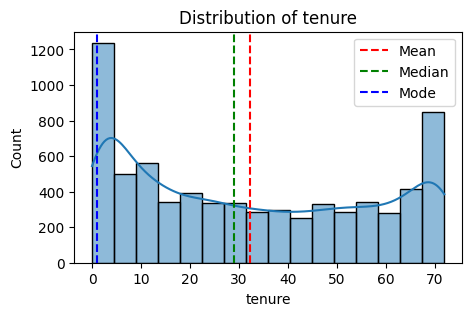

In [ ]:
plot_histogram(df, 'tenure')

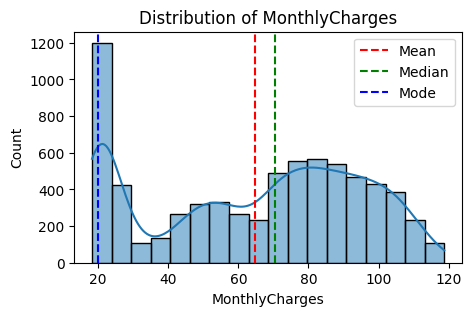

In [ ]:
plot_histogram(df, 'MonthlyCharges')

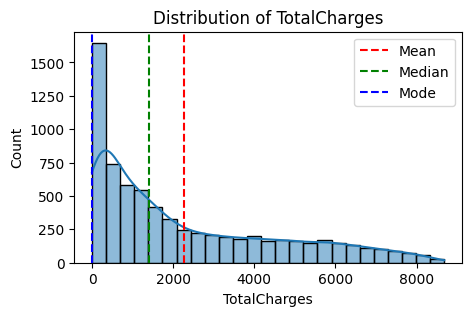

In [ ]:
plot_histogram(df, 'TotalCharges')

**Box plot for numerical features**

In [ ]:
def plot_boxplot(df, column_name):
    plt.figure(figsize=(5,3))
    sns.boxplot(y=df[column_name])
    plt.title(f'Boxplot of {column_name}')
    plt.show()

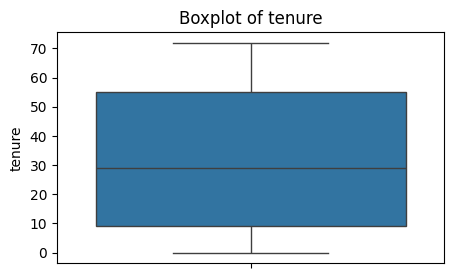

In [ ]:
plot_boxplot(df, 'tenure')

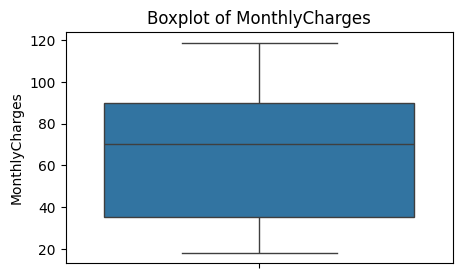

In [ ]:
plot_boxplot(df, 'MonthlyCharges')

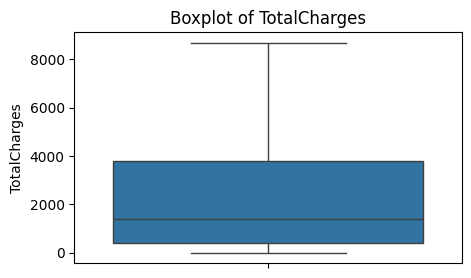

In [ ]:
plot_boxplot(df, 'TotalCharges')

**Correlation Heatmap for Numerical Columns**

In [ ]:
print(df[['tenure', 'MonthlyCharges', 'TotalCharges']].isnull().sum())
print(df[['tenure', 'MonthlyCharges', 'TotalCharges']].dtypes)
print(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr())

tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64
tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object
                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.247900      0.826178
MonthlyCharges  0.247900        1.000000      0.651174
TotalCharges    0.826178        0.651174      1.000000


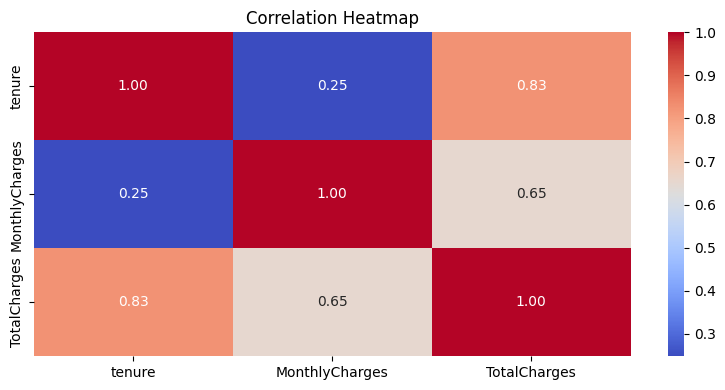

In [ ]:
plt.figure(figsize=(8, 4))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()  # Ensures the plot fits within the figure
plt.show(block=True)  # Forces plot display


**Categorical Feature Analysis**

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
object_cols = df.select_dtypes(include='object').columns

In [ ]:
object_cols = ['SeniorCitizen'] + object_cols

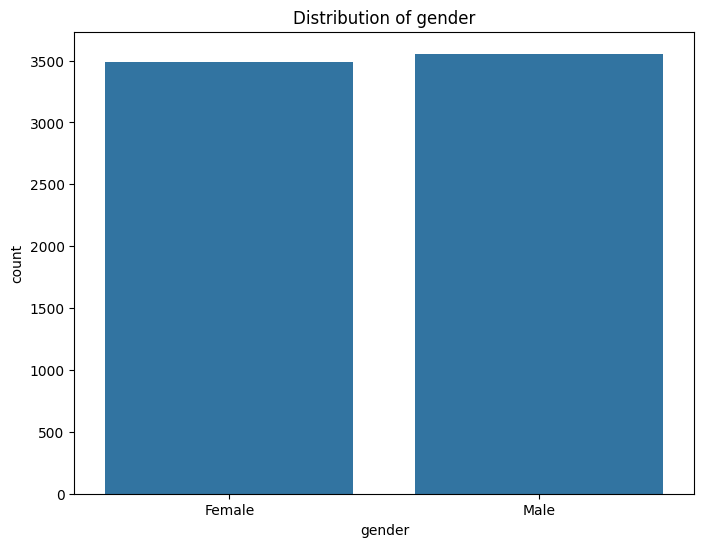

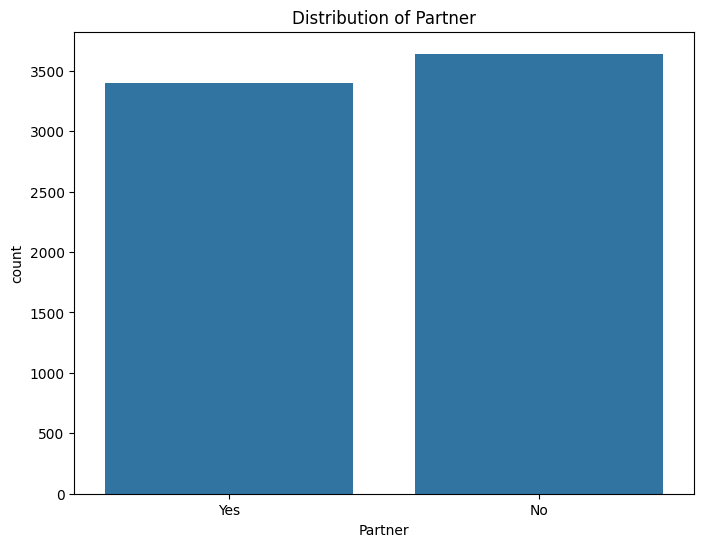

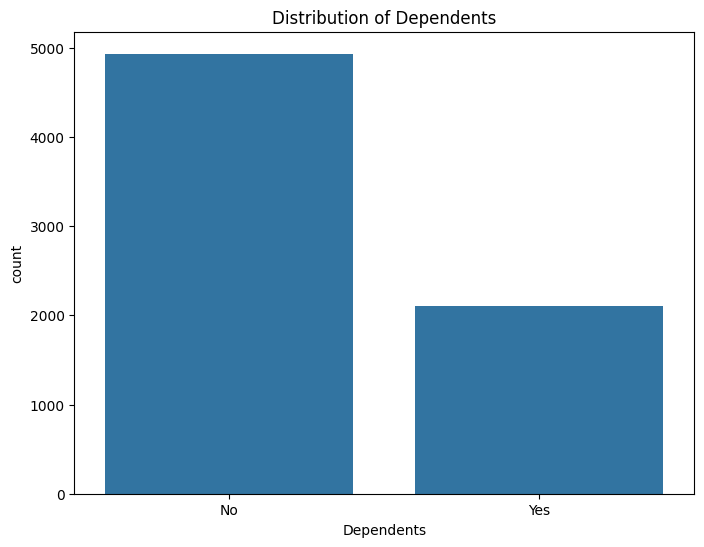

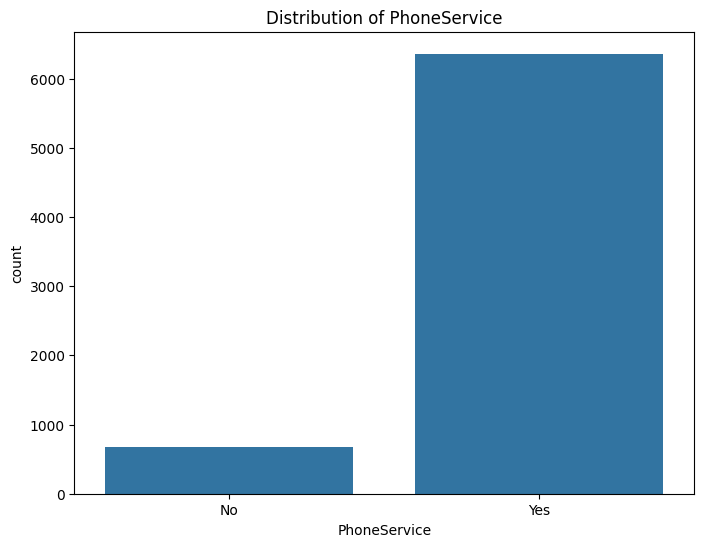

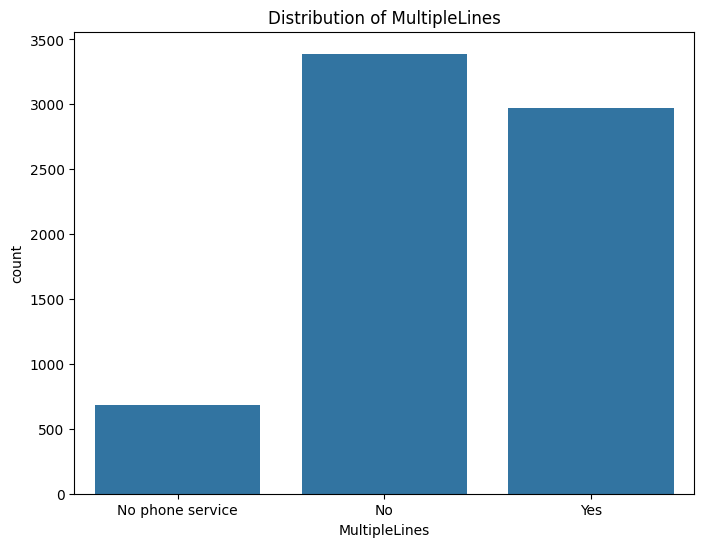

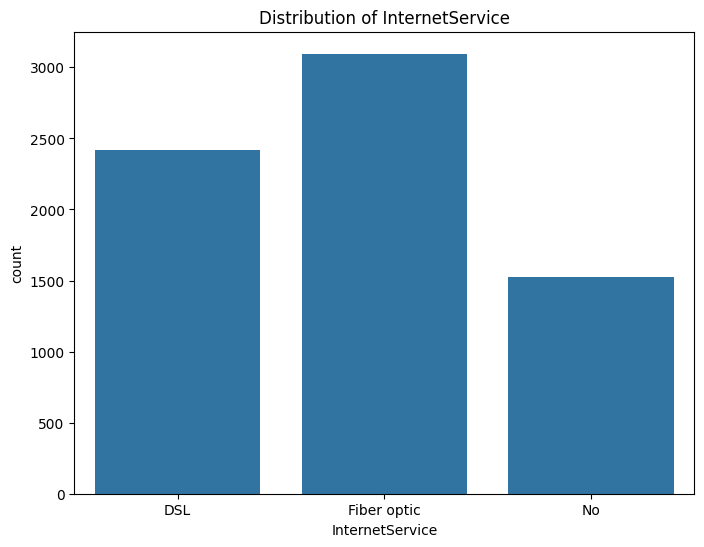

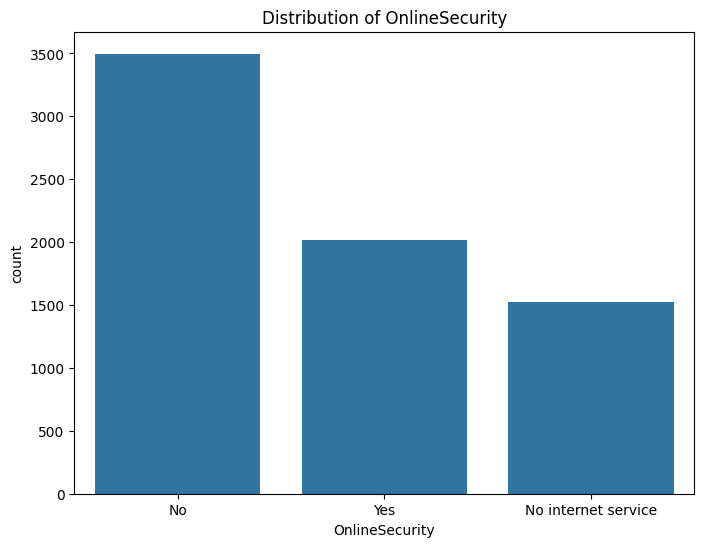

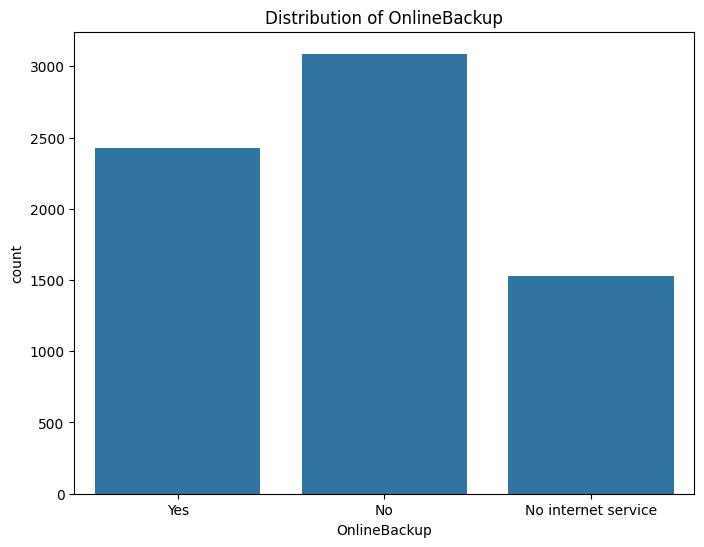

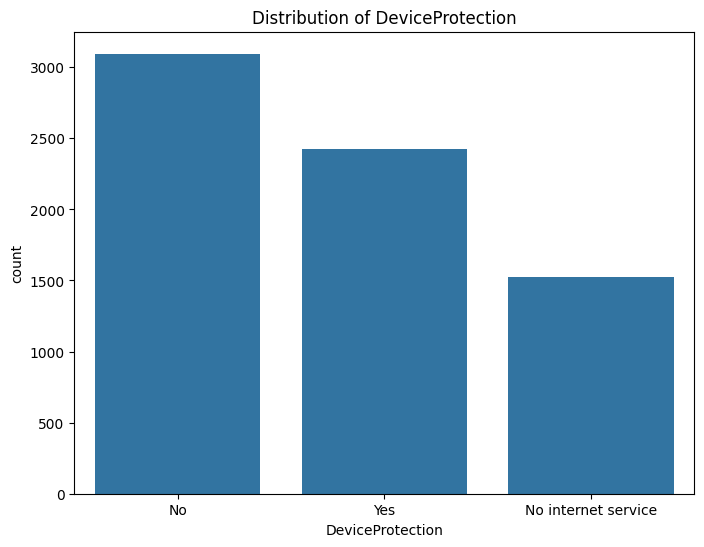

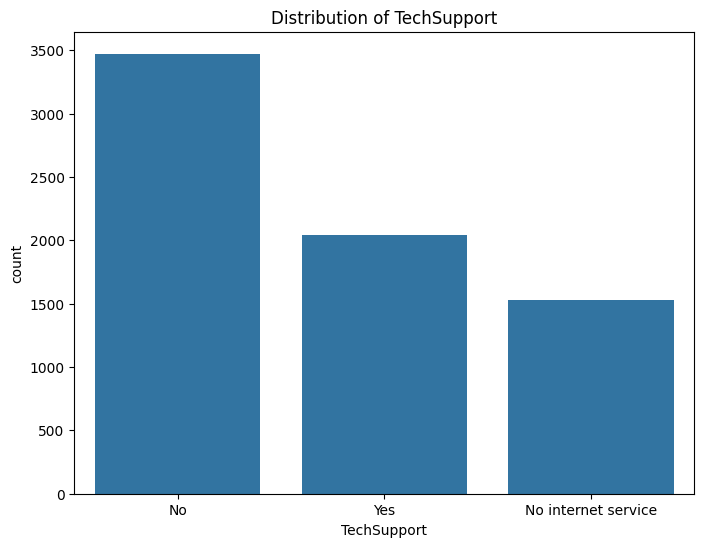

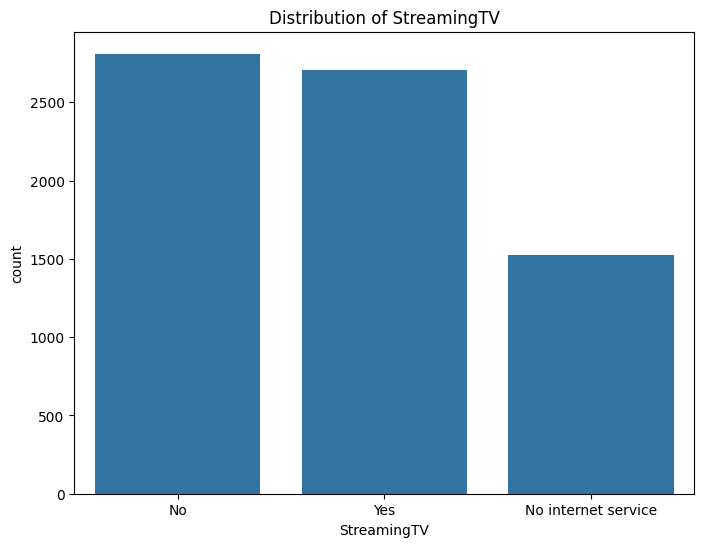

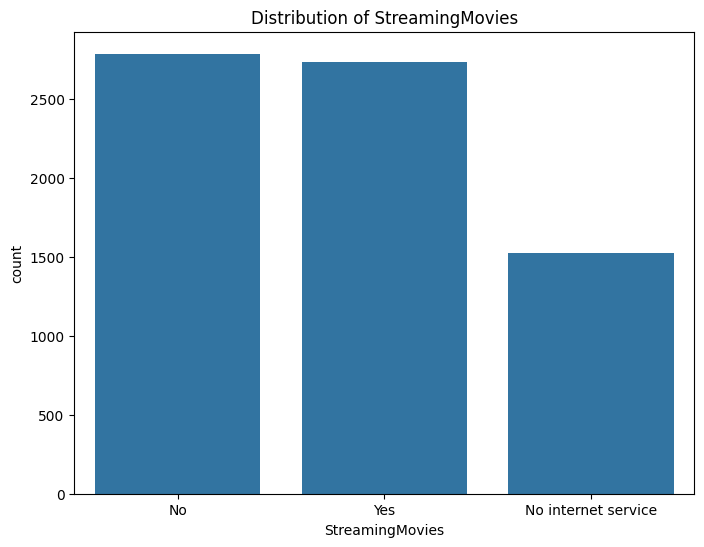

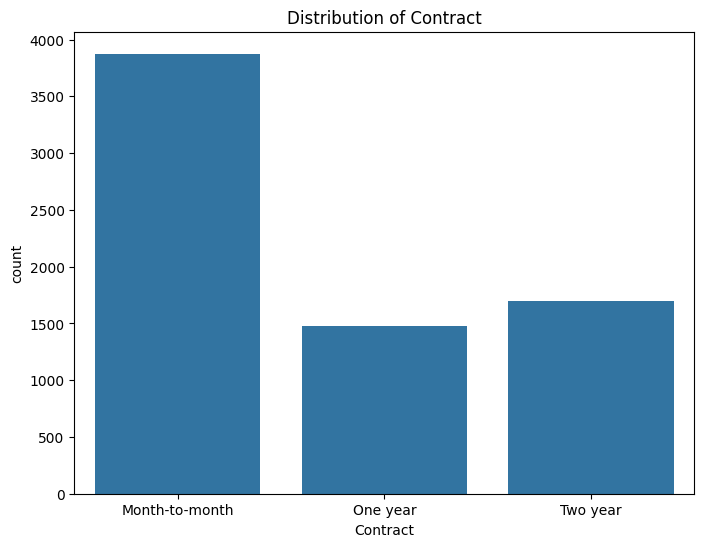

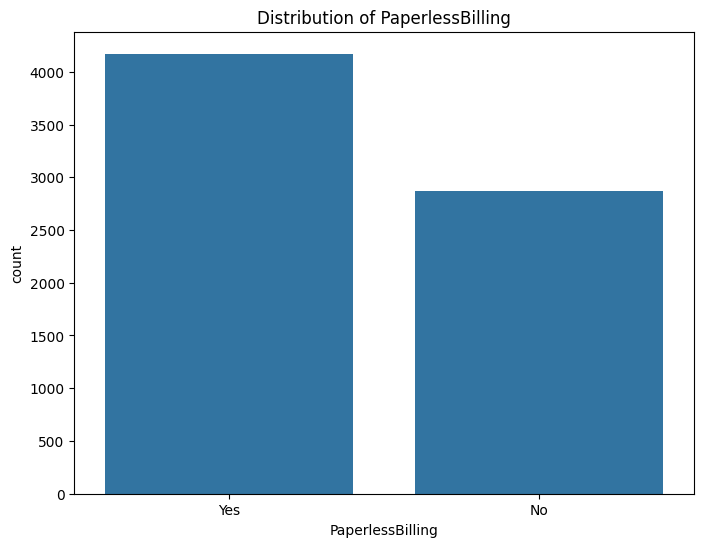

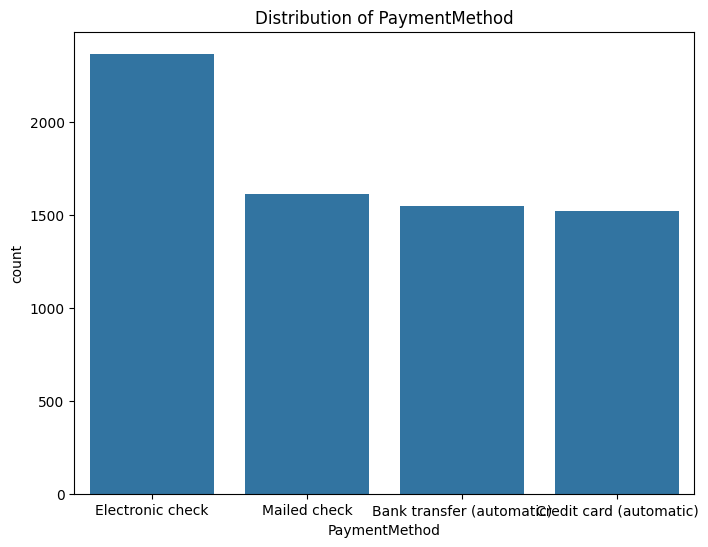

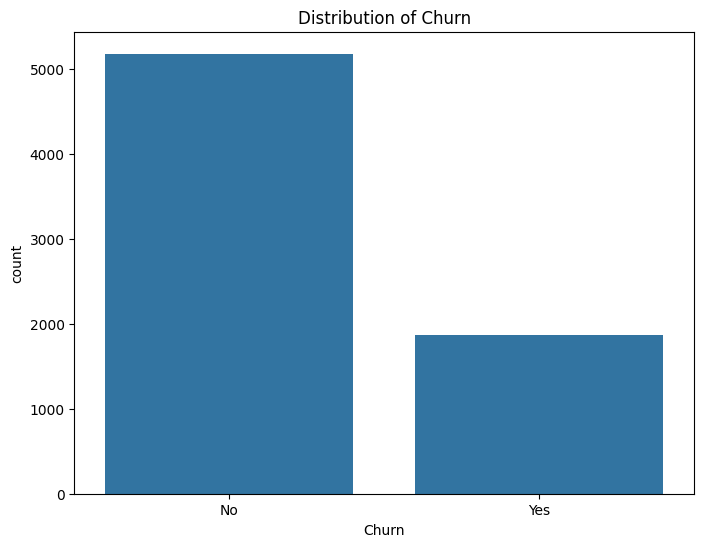

In [ ]:
for col in obejct_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x = df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

**4. Data Preprocessing**

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Label encoding of the target column

In [ ]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
df["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

Label Encoding of Categorical Features

In [ ]:
object_cols = df.select_dtypes(include='object').columns

In [ ]:
print(object_cols)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [ ]:
encoders = {}

for cols in object_cols:
    label_encoder = LabelEncoder()
    df[cols] = label_encoder.fit_transform(df[cols])
    encoders[cols] = label_encoder

In [ ]:
with open('encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

In [ ]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


We can also use one-hot encoding here but the dimension of the dataframe will be very large in this case. To avoid that, label encoding is used.

**Training and Test Data Split**

In [ ]:
X = df.drop(columns=['Churn'])
Y = df['Churn']

In [ ]:
print(X.shape, Y.shape)

(7043, 19) (7043,)


In [ ]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [ ]:
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=19)

In [ ]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(5634, 19) (1409, 19) (5634,) (1409,)


In [ ]:
print(Y_train.value_counts())

Churn
0    4140
1    1494
Name: count, dtype: int64


Synthetic Minority Oversampling TEchnique (SMOTE)

In [ ]:
smote = SMOTE(random_state=19)

In [ ]:
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [ ]:
print(X_train_smote.shape, Y_train_smote.shape)

(8280, 19) (8280,)


In [ ]:
print(Y_train_smote.value_counts())

Churn
0    4140
1    4140
Name: count, dtype: int64


**5. Model Training**

Training with default paramenters

In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=19),
    "Random Forest": RandomForestClassifier(random_state=19),
    "XGBoost": XGBClassifier(random_state=19)
}

In [ ]:
cv_results = {} # To store the cross validation results

for model_name, model in models.items():
    print(f"Training {model_name}")
    print(model)
    print(50*'-')

Training Decision Tree
DecisionTreeClassifier(random_state=19)
--------------------------------------------------
Training Random Forest
RandomForestClassifier(random_state=19)
--------------------------------------------------
Training XGBoost
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=19, ...)

In [ ]:
for model_name, model in models.items():
    print(f"Training {model_name}")
    cv_score = cross_val_score(model, X_train_smote, Y_train_smote, cv=5, scoring='accuracy')
    cv_results[model_name] = cv_score.mean()
    print(f"{model_name} CV Score: {cv_score.mean():.3f}")
    print(50*'-')

Training Decision Tree
Decision Tree CV Score: 0.779
--------------------------------------------------
Training Random Forest
Random Forest CV Score: 0.837
--------------------------------------------------
Training XGBoost
XGBoost CV Score: 0.832
--------------------------------------------------


In [ ]:
cv_results

{'Decision Tree': 0.778864734299517,
 'Random Forest': 0.8365942028985508,
 'XGBoost': 0.832487922705314}

Random Forest gives the highest accuracy compared to other models with default parameters

In [ ]:
rfc = RandomForestClassifier(random_state=19)

In [ ]:
model.fit(X_train_smote, Y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=19, ...)

In [ ]:
Y_test.value_counts()

Churn
0    1034
1     375
Name: count, dtype: int64

**6. Model Evaluation**

In [ ]:
Y_test_pred = model.predict(X_test)

In [ ]:
print("Accuracy Score on Test Data: ", accuracy_score(Y_test, Y_test_pred))
print("Confusion Matrix on Test Data: \n", confusion_matrix(Y_test, Y_test_pred))
print("Classification Report on Test Data: \n", classification_report(Y_test, Y_test_pred))

Accuracy Score on Test Data:  0.7707594038325053
Confusion Matrix on Test Data: 
 [[871 163]
 [160 215]]
Classification Report on Test Data: 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1034
           1       0.57      0.57      0.57       375

    accuracy                           0.77      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.77      0.77      0.77      1409



The recall value is less for the class 1 because the nubmer of values are very less, even a small number of wrong predicitions, causes great variation in the recall value.

In [ ]:
model_data = {"model": rfc, "feature_names": X.columns.to_list()}


with open('customer_churn_model.pkl', 'wb') as f:
    pickle.dump(model_data, f)

**7. Loading the saved model and making predictions**

In [ ]:
with open('customer_churn_model.pkl', 'rb') as f:
    model_data = pickle.load(f)

In [ ]:
loaded_model = model_data['model']
feature_names = model_data['feature_names']

In [ ]:
loaded_model

RandomForestClassifier(random_state=19)

In [ ]:
feature_names

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [ ]:
input_data = {
    "gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "No",
    "tenure": 1,
    "PhoneService": "No",
    "MultipleLines": "No phone service",
    "InternetService": "DSL",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "No",
    "StreamingTV": "No",
    "StreamingMovies": "No",
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Electronic check",
    "MonthlyCharges": 29.85,
    "TotalCharges": 29.85
}

In [ ]:
input_data_df = pd.DataFrame([input_data])

In [ ]:
input_data_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85


In [ ]:
with open('encoders.pkl', 'rb') as f:
    encoders = pickle.load(f)

for column, encoder in encoders.items():
    input_data_df[column] = encoder.transform(input_data_df[column])

In [ ]:
input_data_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85


In [ ]:
prediction = model.predict(input_data_df[feature_names])

In [ ]:
print(f"Churn Prediction: {'Yes' if prediction[0] == 1 else 'No'}")
print(f"Probability of Churn: {model.predict_proba(input_data_df[feature_names])[:, 1][0]:.2f}")

Churn Prediction: Yes
Probability of Churn: 0.89
